# Binomial Trees and Trinomial Trees

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as si
import math
import networkx as nx

# import module
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse

## Binomial Tree Model

#### European Options

In [2]:
def mb_binomial_tree_european(n, S, K, T, r, v, otype='call'):
    dt = T/n
    u = math.exp(v * math.sqrt(dt))
    d = 1/u
    p = (math.exp(r*dt) - d)/(u - d)
    
    # Price tree
    price_tree = np.zeros([n+1, n+1])
    
    for i in range(n+1):
        for j in range(i+1):
            price_tree[j, i] = S * (u ** (i - j)) * (d ** j)

    # Option value
    option = np.zeros([n+1, n+1])

    # Calculate the option price at expiration
    if otype == 'call':
        option[:, n] = np.maximum(np.zeros(n+1), (price_tree[:, n]-K))
    elif otype == 'put':
        option[:, n] = np.maximum(np.zeros(n+1), (K - price_tree[:, n]))
    else:
        raise ValueError("Invalid option type. Please use 'call' or 'put'")

    # Calculate option price at t=0
    for i in range(n-1, -1, -1):
        for j in range(0, i+1):
            option[j, i] = math.exp(-r * dt) * (p * option[j, i + 1] + (1-p) * option[j + 1, i + 1])
    
    return option[0, 0]

print("The case of n = 2:")
# Testing the function with a European call
print("European call price: {:.4f}".format(mb_binomial_tree_european(2, 100, 105, 1, 0.05, 0.2, 'call')))
# Testing the function with a European put
print("European put price:  {:.4f}".format(mb_binomial_tree_european(2, 100, 105, 1, 0.05, 0.2, 'put')))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("The case of n = 10:")
# Testing the function with a European call
print("European call price: {:.4f}".format(mb_binomial_tree_european(10, 100, 105, 1, 0.05, 0.2, 'call')))
# Testing the function with a European put
print("European put price:  {:.4f}".format(mb_binomial_tree_european(10, 100, 105, 1, 0.05, 0.2, 'put')))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("The case of n = 100:")
# Testing the function with a European call
print("European call price: {:.4f}".format(mb_binomial_tree_european(100, 100, 105, 1, 0.05, 0.2, 'call')))
# Testing the function with a European put
print("European put price:  {:.4f}".format(mb_binomial_tree_european(100, 100, 105, 1, 0.05, 0.2, 'put')))

The case of n = 2:
European call price: 8.0812
European put price:  7.9603
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The case of n = 10:
European call price: 8.1763
European put price:  8.0554
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The case of n = 100:
European call price: 8.0262
European put price:  7.9053


#### Visualizing the underlying prices

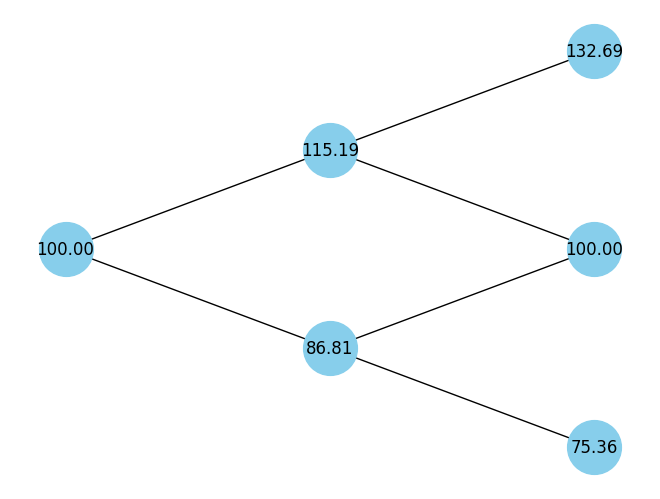

In [3]:
def mb_binomial_tree_underlying_prices(n, S, K, T, r, v):
    # Delta time
    dt = T / n
    # Up and down factors
    u = math.exp(v * math.sqrt(dt))
    d = 1 / u
    # Risk-neutral probability
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize stock price tree
    stock = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(i + 1):
            stock[j, i] = S * (u ** (i - j)) * (d ** j)

    # Displaying the binomial tree graph
    binomial_tree = nx.Graph()

    for i in range(n + 1):
        for j in range(i + 1):
            binomial_tree.add_node((j, i), pos=(i, -(2 * j - i)), value=stock[j, i])

    for i in range(n):
        for j in range(i + 1):
            binomial_tree.add_edge((j, i), (j, i + 1))
            binomial_tree.add_edge((j, i), (j + 1, i + 1))

    pos = nx.get_node_attributes(binomial_tree, 'pos')
    labels = nx.get_node_attributes(binomial_tree, 'value')
    labels = {key: f'{value:.2f}' for key, value in labels.items()}

    nx.draw(binomial_tree, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=1500)
    plt.show()

mb_binomial_tree_underlying_prices(2, 100, 105, 1, 0.05, 0.2)

#### Visualizing the call prices

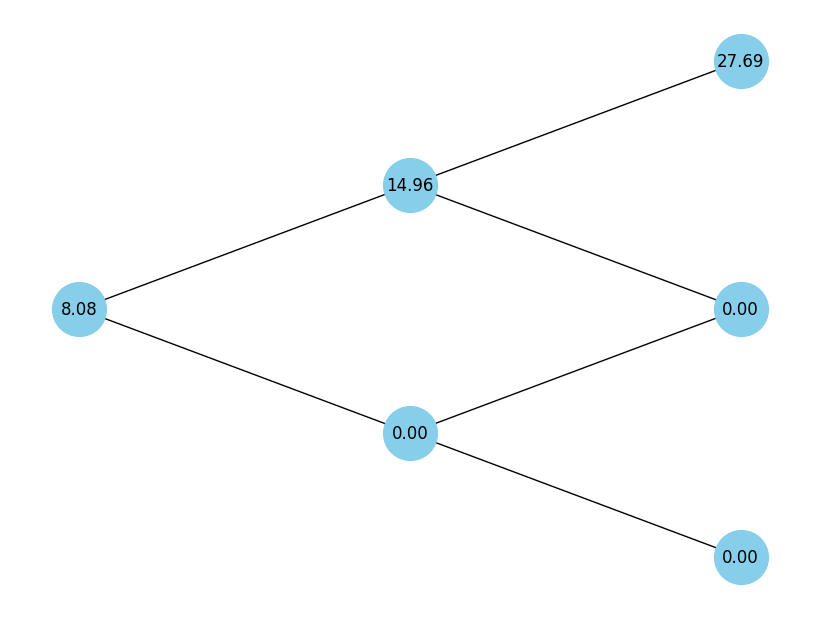

In [4]:
def mb_binomial_tree_european_call(n, S, K, T, r, v):
    # Delta time
    dt = T / n
    # Up and down factors
    u = math.exp(v * math.sqrt(dt))
    d = 1 / u
    # Risk-neutral probability
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize stock price tree
    stock = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(i + 1):
            stock[j, i] = S * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option = np.zeros([n + 1, n + 1])
    option[:, n] = np.maximum(np.zeros(n + 1), stock[:, n] - K)

    # Calculate the option price at t=0
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option[j, i] = math.exp(-r * dt) * (p * option[j, i + 1] + (1 - p) * option[j + 1, i + 1])

    # Displaying the binomial tree graph
    binomial_tree = nx.Graph()

    for i in range(n + 1):
        for j in range(i + 1):
            binomial_tree.add_node((j, i), pos=(i, 2 * j - i - n), value=option[j, i] if j <= i else None)

    for i in range(n):
        for j in range(i + 1):
            binomial_tree.add_edge((j, i), (j, i + 1))
            binomial_tree.add_edge((j, i), (j + 1, i + 1))

    pos = nx.get_node_attributes(binomial_tree, 'pos')
    labels = nx.get_node_attributes(binomial_tree, 'value')
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    plt.figure(figsize=(8, 6))
    nx.draw(binomial_tree, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=1500, font_color='black')
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

mb_binomial_tree_european_call(2, 100, 105, 1, 0.05, 0.2)

In [5]:
def mb_binomial_tree_european_call(n, S, K, T, r, v):
    # Delta time
    dt = T / n
    # Up and down factors
    u = math.exp(v * math.sqrt(dt))
    d = 1 / u
    # Risk-neutral probability
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize stock price tree
    stock = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(i + 1):
            stock[j, i] = S * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option = np.zeros([n + 1, n + 1])
    option[:, n] = np.maximum(np.zeros(n + 1), stock[:, n] - K)

    # Calculate the option price at t=0
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option[j, i] = math.exp(-r * dt) * (p * option[j, i + 1] + (1 - p) * option[j + 1, i + 1])

    # Displaying the binomial tree graph
    binomial_tree = nx.Graph()

    for i in range(n + 1):
        for j in range(i + 1):
            binomial_tree.add_node((j, i), pos=(i, 2 * j - i - n), value=option[j, i] if j <= i else None)

    for i in range(n):
        for j in range(i + 1):
            binomial_tree.add_edge((j, i), (j, i + 1))
            binomial_tree.add_edge((j, i), (j + 1, i + 1))

    pos = nx.get_node_attributes(binomial_tree, 'pos')
    labels = nx.get_node_attributes(binomial_tree, 'value')
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    plt.figure(figsize=(8, 6))
    nx.draw(binomial_tree, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=1500, font_color='black')
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

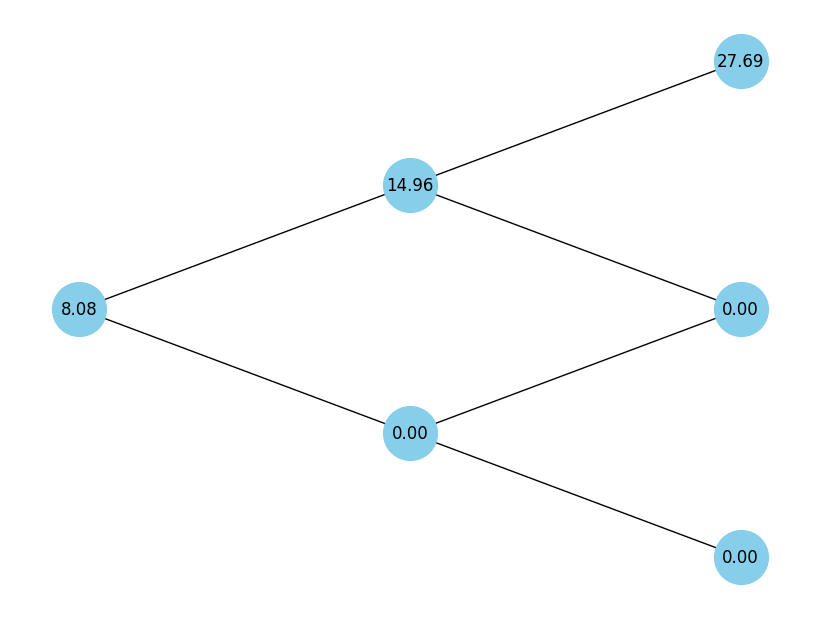

In [6]:
# case of n=2
mb_binomial_tree_european_call(2, 100, 105, 1, 0.05, 0.2)

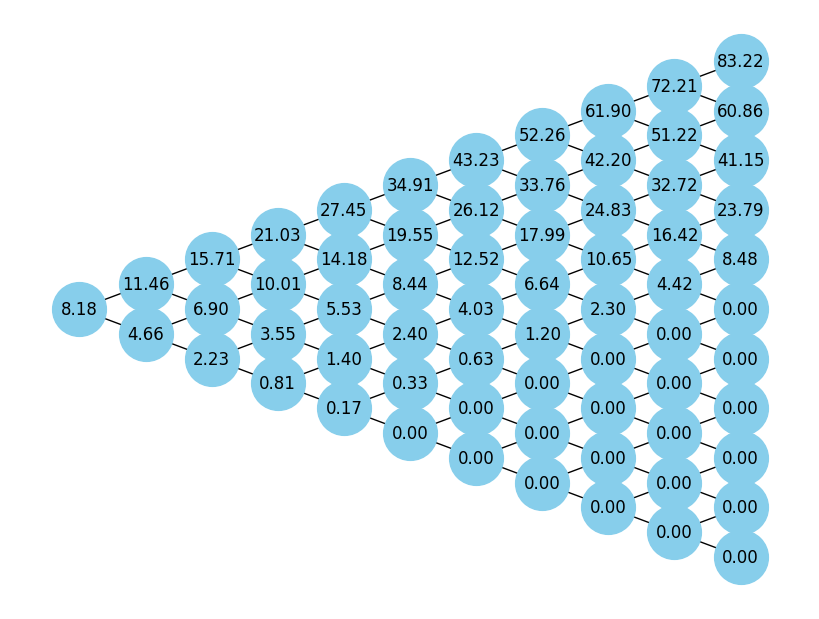

In [7]:
# case of n=10
mb_binomial_tree_european_call(10, 100, 105, 1, 0.05, 0.2)

#### Visualizing the put prices

In [8]:
def mb_binomial_tree_european_put(n, S, K, T, r, v):
    # Delta time
    dt = T / n
    # Up and down factors
    u = math.exp(v * math.sqrt(dt))
    d = 1 / u
    # Risk-neutral probability
    p = (math.exp(r * dt) - d) / (u - d)

    # Initialize stock price tree
    stock = np.zeros([n + 1, n + 1])
    for i in range(n + 1):
        for j in range(i + 1):
            stock[j, i] = S * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option = np.zeros([n + 1, n + 1])
    option[:, n] = np.maximum(np.zeros(n + 1), K - stock[:, n])  # Change here for put option

    # Calculate the option price at t=0
    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option[j, i] = math.exp(-r * dt) * (p * option[j, i + 1] + (1 - p) * option[j + 1, i + 1])

    # Displaying the binomial tree graph
    binomial_tree = nx.Graph()

    for i in range(n + 1):
        for j in range(i + 1):
            binomial_tree.add_node((j, i), pos=(i, 2 * j - i - n), value=option[j, i] if j <= i else None)

    for i in range(n):
        for j in range(i + 1):
            binomial_tree.add_edge((j, i), (j, i + 1))
            binomial_tree.add_edge((j, i), (j + 1, i + 1))

    pos = nx.get_node_attributes(binomial_tree, 'pos')
    labels = nx.get_node_attributes(binomial_tree, 'value')
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    plt.figure(figsize=(8, 6))
    nx.draw(binomial_tree, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=1500, font_color='black')
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

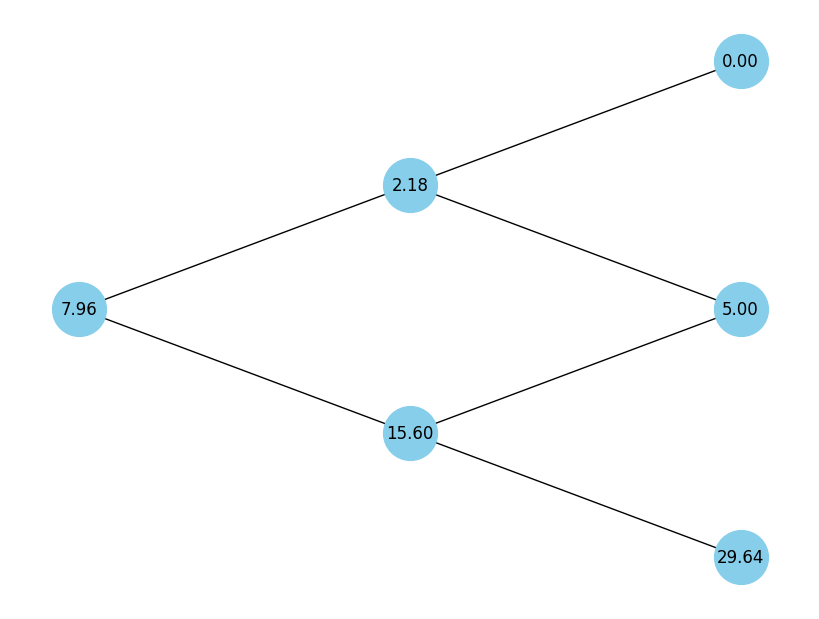

In [9]:
# case of n=2
mb_binomial_tree_european_put(2, 100, 105, 1, 0.05, 0.2)

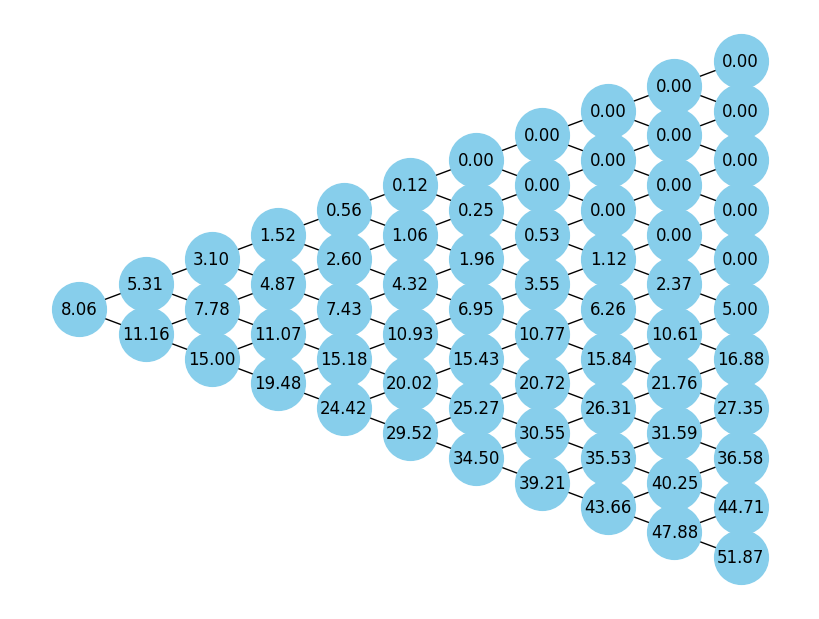

In [10]:
# case of n=10
mb_binomial_tree_european_put(10, 100, 105, 1, 0.05, 0.2)

#### American Options

In [11]:
def mb_binomial_tree_american(n, S, K, T, r, v, otype='call'):
    dt = T/n
    u = math.exp(v * math.sqrt(dt))
    d = 1/u
    p = (math.exp(r*dt) - d)/(u - d)
    
    # Price tree
    price_tree = np.zeros([n+1, n+1])
    
    for i in range(n+1):
        for j in range(i+1):
            price_tree[j, i] = S * (u ** (i - j)) * (d ** j)

    # Option value
    option = np.zeros([n+1, n+1])

    # Calculate the option price at expiration
    if otype == 'call':
        option[:, n] = np.maximum(np.zeros(n+1), (price_tree[:, n]-K))
    elif otype == 'put':
        option[:, n] = np.maximum(np.zeros(n+1), (K - price_tree[:, n]))
    else:
        raise ValueError("Invalid option type. Please use 'call' or 'put'")

    # Calculate option price at t=0
    for i in range(n-1, -1, -1):
        for j in range(0, i+1):
            if otype == 'call':
                exercise = np.maximum(price_tree[j, i] - K, 0)
            elif otype == 'put':
                exercise = np.maximum(K - price_tree[j, i], 0)
            
            no_exercise = math.exp(-r * dt) * (p * option[j, i + 1] + (1-p) * option[j + 1, i + 1])
            option[j, i] = np.maximum(exercise, no_exercise)
    
    return option[0, 0]

# Testing the function with an American call
print("American call price:  {:.4f}".format(mb_binomial_tree_american(10, 100, 105, 1, 0.05, 0.2, 'call')))
# Testing the function with an American put
print("American put price:   {:.4f}".format(mb_binomial_tree_american(10, 100, 105, 1, 0.05, 0.2, 'put')))

American call price:  8.1763
American put price:   8.8550


## Trinomial Tree Model

In [12]:
def mb_trinomial_tree_european(n, S, K, T, r, v, otype='call'):
    # Calculating delta T
    dt = T/n

    # Parameters for trinomial tree
    dx = v * math.sqrt(3 * dt)
    nu = r - 0.5 * v**2
    pu = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 + nu * dt / dx)
    pd = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 - nu * dt / dx)
    pm = 1 - pu - pd

    # Initialize arrays for storing stock prices and option values
    stock_price = np.zeros((2*n+1, n+1))
    option_value = np.zeros((2*n+1, n+1))

    # Calculate stock prices
    for i in range(-n, n+1):
        stock_price[i, :] = S * np.exp(i * dx)

    # Calculate option values at maturity
    if otype == 'call':
        option_value[:, n] = np.maximum(stock_price[:, n] - K, 0)
    elif otype == 'put':
        option_value[:, n] = np.maximum(K - stock_price[:, n], 0)

    # Perform backward iteration to find option value at t=0
    for j in range(n-1, -1, -1):
        for i in range(-j, j+1):
            option_value[i, j] = math.exp(-r * dt) * (
                pu * option_value[i+1, j+1] + 
                pm * option_value[i, j+1] + 
                pd * option_value[i-1, j+1]
            )
    return option_value[0, 0]

# Testing the function with a European call
print("European call price:  {:.4f}".format(mb_trinomial_tree_european(2, 100, 105, 1, 0.05, 0.2, 'call')))
# Testing the function with a European put
print("European put price:   {:.4f}".format(mb_trinomial_tree_european(2, 100, 105, 1, 0.05, 0.2, 'put')))

European call price:  7.9121
European put price:   7.7915


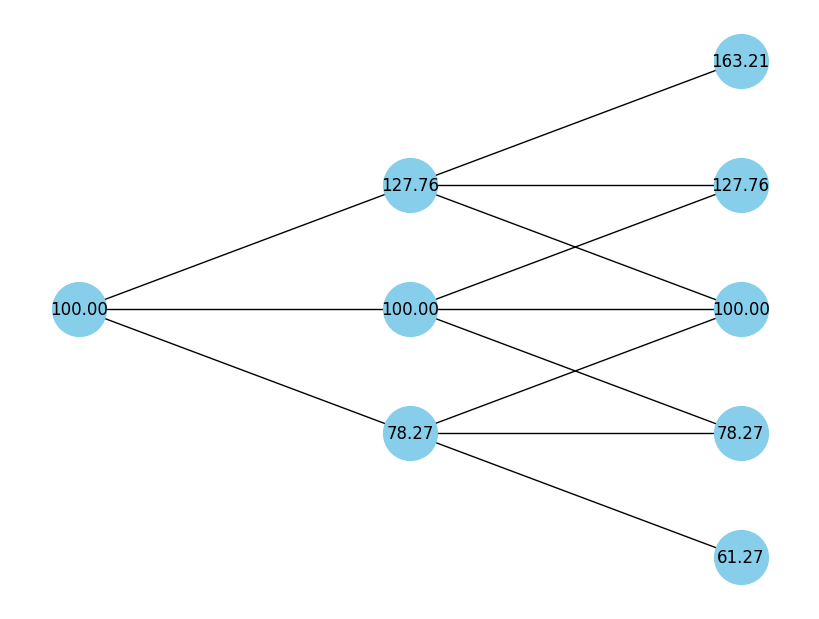

In [13]:
def mb_trinomial_tree_underlying_prices(n, S, K, T, r, v):
    # Calculating delta T
    dt = T/n

    # Parameters for trinomial tree
    dx = v * math.sqrt(3 * dt)
    nu = r - 0.5 * v**2

    # Initialize arrays for storing stock prices
    stock_price = np.zeros((2*n+1, n+1))

    # Calculate stock prices
    for i in range(n+1):
        for j in range(-i, i+1):
            stock_price[j + n, i] = S * np.exp(j * dx)

    # Create a graph object to represent the trinomial tree
    trinomial_tree = nx.Graph()

    # Add nodes to the tree with underlying prices
    for i in range(n + 1):
        for j in range(-i, i + 1):
            trinomial_tree.add_node((i, j), pos=(i, n - j), value=stock_price[j + n, i])

    # Add edges to the tree
    for i in range(n):
        for j in range(-i, i + 1):
            if (i + 1, j + 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j + 1))
            if (i + 1, j) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j))
            if (i + 1, j - 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j - 1))

    # Get node positions and underlying prices for plotting
    pos = nx.get_node_attributes(trinomial_tree, 'pos')
    labels = nx.get_node_attributes(trinomial_tree, 'value')

    # Filter out nodes with no underlying price
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    # Draw the trinomial tree
    plt.figure(figsize=(8, 6))
    nx.draw(trinomial_tree, pos, labels=labels, with_labels=True, node_color="skyblue", node_size=1500)
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

mb_trinomial_tree_underlying_prices(2, 100, 105, 1, 0.05, 0.2)

#### Visualizing the call prices

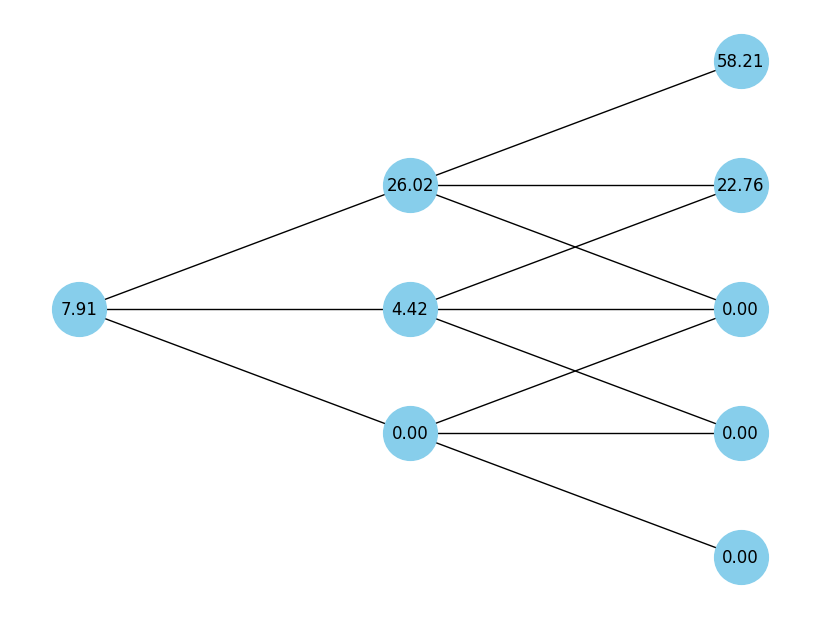

In [14]:
def mb_trinomial_tree_european_call(n, S, K, T, r, v):
    # Calculating delta T
    dt = T/n

    # Parameters for trinomial tree
    dx = v * math.sqrt(3 * dt)
    nu = r - 0.5 * v**2
    pu = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 + nu * dt / dx)
    pd = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 - nu * dt / dx)
    pm = 1 - pu - pd

    # Initialize arrays for storing stock prices and option values
    stock_price = np.zeros((2*n+1, n+1))
    option_value = np.zeros((2*n+1, n+1))

    # Calculate stock prices
    for i in range(n+1):
        for j in range(-i, i+1):
            stock_price[j + n, i] = S * np.exp(j * dx)

    # Calculate option values at maturity
    option_value[:, n] = np.maximum(stock_price[:, n] - K, 0)

    # Perform backward iteration to find option value at t=0
    for j in range(n-1, -1, -1):
        for i in range(-j, j+1):
            option_value[i + n, j] = math.exp(-r * dt) * (
                pu * option_value[i + n + 1, j + 1] + 
                pm * option_value[i + n, j + 1] + 
                pd * option_value[i + n - 1, j + 1]
            )

    # Create a graph object to represent the trinomial tree
    trinomial_tree = nx.Graph()

    # Add nodes to the tree with underlying prices and option values
    for i in range(n + 1):
        for j in range(-i, i + 1):
            trinomial_tree.add_node((i, j), pos=(i, n - j), value=option_value[j + n, i])

    # Add edges to the tree
    for i in range(n):
        for j in range(-i, i + 1):
            if (i + 1, j + 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j + 1))
            if (i + 1, j) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j))
            if (i + 1, j - 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j - 1))

    # Get node positions and option values for plotting
    pos = nx.get_node_attributes(trinomial_tree, 'pos')
    labels = nx.get_node_attributes(trinomial_tree, 'value')

    # Filter out nodes with no option value
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    # Draw the trinomial tree
    plt.figure(figsize=(8, 6))
    nx.draw(trinomial_tree, pos, labels=labels, with_labels=True, node_color="skyblue", node_size=1500)
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

mb_trinomial_tree_european_call(2, 100, 105, 1, 0.05, 0.2)

#### Visualizing the put prices

In [15]:
def mb_trinomial_tree_european_put(n, S, K, T, r, v):
    # Calculating delta T
    dt = T/n

    # Parameters for trinomial tree
    dx = v * math.sqrt(3 * dt)
    nu = r - 0.5 * v**2
    pu = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 + nu * dt / dx)
    pd = 0.5 * ((v**2 * dt + nu**2 * dt**2) / dx**2 - nu * dt / dx)
    pm = 1 - pu - pd

    # Initialize arrays for storing stock prices and option values
    stock_price = np.zeros((2*n+1, n+1))
    option_value = np.zeros((2*n+1, n+1))

    # Calculate stock prices
    for i in range(n+1):
        for j in range(-i, i+1):
            stock_price[j + n, i] = S * np.exp(j * dx)

    # Calculate option values at maturity
    option_value[:, n] = np.maximum(K - stock_price[:, n], 0)

    # Perform backward iteration to find option value at t=0
    for j in range(n-1, -1, -1):
        for i in range(-j, j+1):
            option_value[i + n, j] = math.exp(-r * dt) * (
                pu * option_value[i + n + 1, j + 1] + 
                pm * option_value[i + n, j + 1] + 
                pd * option_value[i + n - 1, j + 1]
            )

    # Create a graph object to represent the trinomial tree
    trinomial_tree = nx.Graph()

    # Add nodes to the tree with underlying prices and option values
    for i in range(n + 1):
        for j in range(-i, i + 1):
            trinomial_tree.add_node((i, j), pos=(i, n - j), value=option_value[j + n, i])

    # Add edges to the tree
    for i in range(n):
        for j in range(-i, i + 1):
            if (i + 1, j + 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j + 1))
            if (i + 1, j) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j))
            if (i + 1, j - 1) in trinomial_tree.nodes:
                trinomial_tree.add_edge((i, j), (i + 1, j - 1))

    # Get node positions and option values for plotting
    pos = nx.get_node_attributes(trinomial_tree, 'pos')
    labels = nx.get_node_attributes(trinomial_tree, 'value')

    # Filter out nodes with no option value
    labels = {key: f'{value:.2f}' for key, value in labels.items() if value is not None}

    # Draw the trinomial tree
    plt.figure(figsize=(8, 6))
    nx.draw(trinomial_tree, pos, labels=labels, with_labels=True, node_color="skyblue", node_size=1500)
    plt.gca().invert_yaxis()  # Invert y-axis to align the first node at the top
    plt.axis('off')  # Turn off axis display
    plt.show()

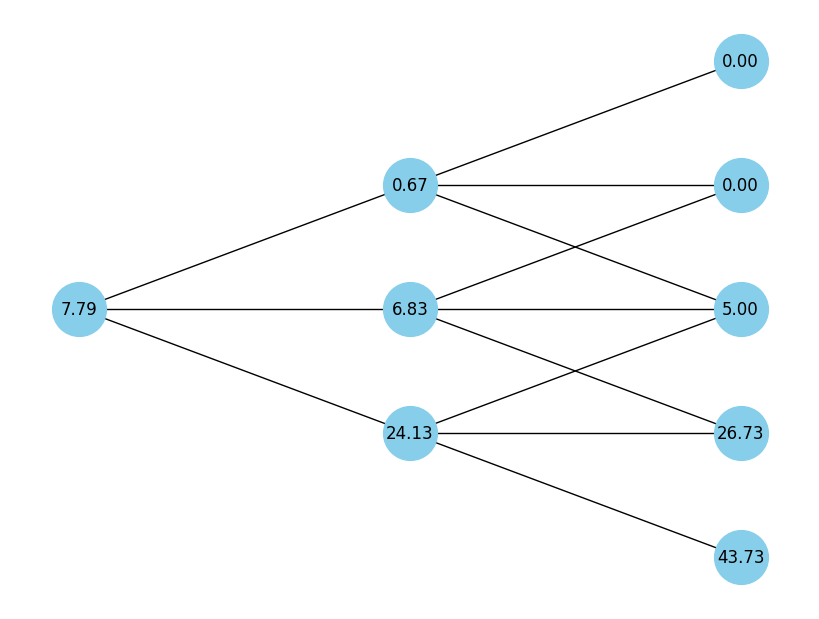

In [16]:
# case of n=2
mb_trinomial_tree_european_put(2, 100, 105, 1, 0.05, 0.2)

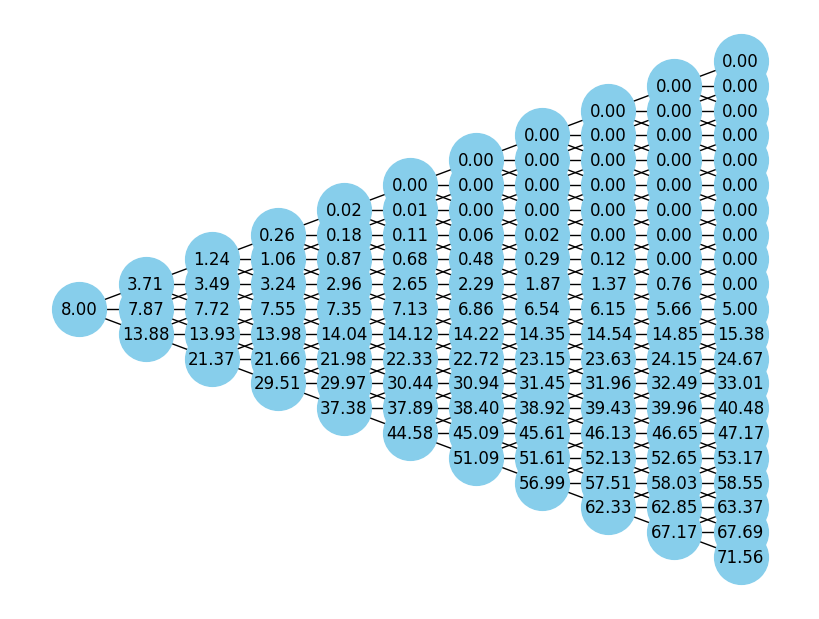

In [17]:
# case of n=10
mb_trinomial_tree_european_put(10, 100, 105, 1, 0.05, 0.2)

## Black and Scholes model mb_black_scholes function for comparison

In [18]:
# mb_black_scholes function needs the following variables:
# S: spot price
# K: strike price
# T: time to maturity
# r: interest rate
# v: volatility of underlying asset

def mb_black_scholes(S, K, T, r, v, option = 'call'):
    d1 = (np.log(S / K) + (r + 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * v ** 2) * T) / (v * np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result

call_price = mb_black_scholes(100, 105, 1, 0.05, 0.2, option = 'call')
put_price = mb_black_scholes(100, 105, 1, 0.05, 0.2, option = 'put')

print(f"The Black-Scholes price of the call option is: {call_price:.4f}")
print(f"The Black-Scholes price of the put option is:  {put_price:.4f}")

The Black-Scholes price of the call option is: 8.0214
The Black-Scholes price of the put option is:  7.9004
